# Projeto: Modelo Preditivo para detecção de fraudes

![banner](images/banner.png)

Atualmente, o cartão, seja de crédito ou débito, é o principal meio de pagamento adotado por consumidores, por vantagens com a facilidade e segurança ao pagar suas compras e esse tipo de prática aumenta dia a dia.

Com a quantidade de vendas realizadas com cartão, também aumenta-se o risco de fraudes com cartões e as instituições devem, de alguma forma ou artificio, tentar prever quando uma transação é legítima ou não.

Embora muitas instituições terem tomados ações para combater as fraudes, é provável que nunca será resolvido 100%, portanto a meta principal é minimizar tanto quanto possível esse tipo de situação.

Essa é a proposta desse Projeto, criar um modelo que minimize ao máximo os impactos causados por essa prática.


## Sobre o Conjunto de dados

Este conjunto de dados está disponibilizado no [Kaggle: Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud).

![placar](images/placar.png)

Contêm transações feitas por cartões de crédito em setembro de 2013 por titulares europeus.
Este conjunto de dados apresenta as transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desbalanceado, a classe positiva (fraudes) é responsável por 0,172% de todas as transações.

Composto apenas por variáveis de entrada numéricas que são o resultado de uma transformação PCA. Devido a questões de confidencialidade, o conjunto não contém as *features* originais e mais informações básicas sobre os dados. As *features* V1, V2,… V28 são os componentes principais obtidos com o *PCA*, as únicas *features* que não foram transformados com este *framework* são "*Time*" e "*Amount*". A *feature* *Time* contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. A *feature* *Amount* é o valor da transação.

A *feature* "*Class*" é a variável resposta e assume o valor 1 em caso de fraude e 0 em caso contrário.


## Sumário e principais resultados

### Objetivo
Criar um sistema que ao entrar com os dados, retorna se a transação é fraude.

### Input
Conjunto de dados de 284.807 amostras e 31 colunas.

### Output
Modelo treinado com Machine Learning, salvo em formato pickle e resultados salvos em um banco de dados ou planilha.

### Index
* 1. Importes
    * 1.1. Importando as bibliotecas
    * 1.2. Importando o Dataset
* 2. Análise Exploratória dos Dados
    * 2.1. Descrição dos dados
    * 2.2. Análises estatísticas
* 3. Machine Learning
    * 3.1. Preparação dos dados
    * 3.2. Definindo a baseline
    * 3.3. Reamostragem, teste e validação
        * 3.3.1. Distribuição (Random UnderSampling)
        * 3.3.2. Distribuição (Random Over-Sampling)
        * 3.3.3. SMOTE (Over-Sampling)
        * 3.3.4. Híbrido: Oversampling e Undersampling
    * 3.4. Avaliação dos modelos
    * 3.5. Ajustando (tunning) o modelo selecionado
    * 3.6. Avaliação do modelo ajustado
        * 3.6.1. Análise das principais métricas de classificação
        * 3.6.2. Curva ROC-AUC
        * 3.6.3. Curva Precision-Recall
        * 3.7. Conhecendo as variáveis importantes
* 4. Modelo Final
        * 4.1. Treinamento do modelo
        * 4.2. Preparação, previsão e avaliação nos dados de teste
        * 4.3. Salvando o modelo treinado
        * 4.4. Salvando os resultados
* 5. Conclusão
* 6. Referências


### Resultados

`BASELINE`:<br>
Modelo: **Regressão Logística**<BR>
    
**Dados de VALIDAÇÃO:**<br>
* **accuracy:**  0.998814<br>
* **precision:** 0.643678<br>
* **recall:**    0.708860<br>
* **f1:**        0.674698<br>

`MODELO FINAL`:<BR>
Modelo: **Random Forest**<BR>

**Dados de TESTE:**<br>
* **accuracy:**  0.999508<br>
* **precision:** 0.864583 (26% de melhoria)<br>
* **recall:**    0.846938 (16% de melhoria)<br>
* **f1:**        0.855670 (21% de melhoria)<br>
    
## Como o modelo poderá ser usado?
    
Poderemos criar uma API que recebe os dados de entrada e com o modelo treinado, o resultado é retornado ao usuário.

## 1. Importes

### 1.1. Importando as bibliotecas

In [1]:
# manipulação e visualização
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# métricas de avaliação
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Reamostragem dos dados
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# outras
import time
import pickle
import warnings
from scipy import interp
from pprint import pprint
from scipy.stats import norm
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

# mesagens de warning
warnings.filterwarnings("ignore")

### 1.2. Importando o Dataset

Vamos começar importando o arquivo, este arquivo foi baixado em formato *zip*, então não precisamos descompactar, se o original é em formato *csv* podemos utilizar *read_csv* do pandas e passar "zip" com argumento do parâmetro *compression*.

In [2]:
# importando o arquivo
df = pd.read_csv('../input/creditcard.csv.zip', compression='zip', header=0)

# visualizando as primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Análise Exploratória dos Dados

A análise exploratória de dados é uma abordagem para analisar conjuntos de dados e resumir suas características principais, geralmente com métodos visuais. Um modelo estatístico pode ser usado ou não, mas principalmente, este processo é para ver o que os dados podem nos dizer além da modelagem formal ou tarefa de teste de hipóteses.

### 2.1. Descrição dos dados

Vamos ver como os dados estão dispostos, checando suas dimensões e se há dados faltantes.

In [3]:
# visualizando suas dimensões
df.shape

(284807, 31)

In [4]:
# visualizando a quantidade em cada linha e seu formato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Podemos observar que **não há nenhum dado faltante e todas as *features* estão com formato numérico**, como esperávamos.

### 2.2. Análises estatísticas

Vamos dar uma olhada inicial nas principais **estatísticas descritivas**. Uma análise descritiva é um primeiro passo importante para a realização de análises estatísticas, pois nos dá uma idéia da distribuição dos nossos dados e ajuda-nos a detectar *outliers*.

In [5]:
# visualizando as estatísticas
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Como descrito no início, já vimos que o nosso *target* está desbalanceado, mas vamos dar uma olhada na quantidade e visualizar graficamente. Após termos uma idéia da disposição desses dados, podemos analisar graficamente adiante.

Transações sem fraudes: 99.83%
Transações com fraudes: 0.17%



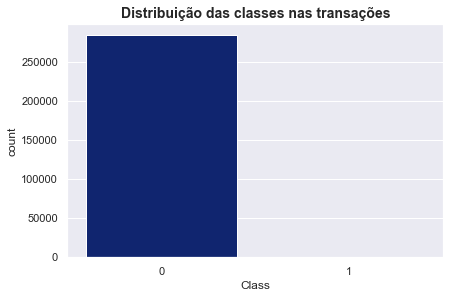

In [6]:
# imprimindo a quantidade de cada classe
print(f'Transações sem fraudes: {round(df.Class.value_counts(normalize=True)[0]*100, 2)}%')
print(f'Transações com fraudes: {round(df.Class.value_counts(normalize=True)[1]*100, 2)}%\n')

# definindo a área de plotagem
plt.figure(figsize=(6,4))

# plotando o gráfico
sns.countplot(df.Class)

# definindo título
plt.title('Distribuição das classes nas transações', fontweight='bold', fontsize=14)

# exibindo o gráfico
plt.show()

Podemos notar que esta classe está extremamente desbalanceada, sendo que menos de 1% são transações fraudulentas.

Vamos também dar uma olhada na distribuição da variável **Valor** ou *Amount*.

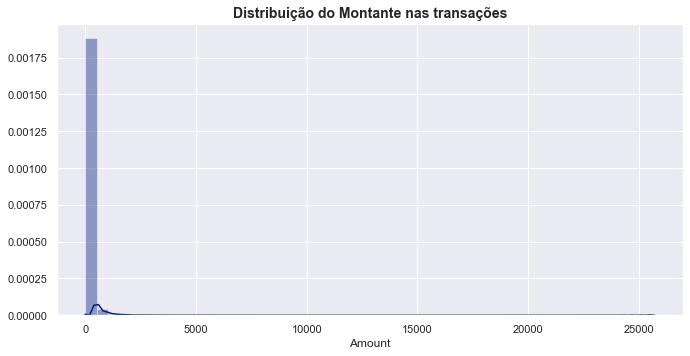

In [7]:
# definindo a área de plotagem
plt.figure(figsize=(10,5))

# plotando o gráfico
sns.distplot(df.Amount)

# definindo título
plt.title("Distribuição do Montante nas transações", fontsize=14, fontweight='bold')

# exibindo o gráfico
plt.show()

Como os registros são de um banco europeu, embora não mencionado a moeda, suponhamos que está em *euros*.

Notamos que a **distribuição não é simétrica e com outliers**, tendo uma média de 88, sendo o mínimo de 0 e o máximo de 25k, aproximadamente e o que chama a atenção é que o **3º quartil o valor é de 77, sendo muito distante do máximo**, podendo ter sido realizada uma transação nesse período com o valor extremamente alto, comparado aos demais.

Para tentar melhorar o formato dessa distribuição vamos normalizar, passando a função logaritmica do numpy, a **np.log**.

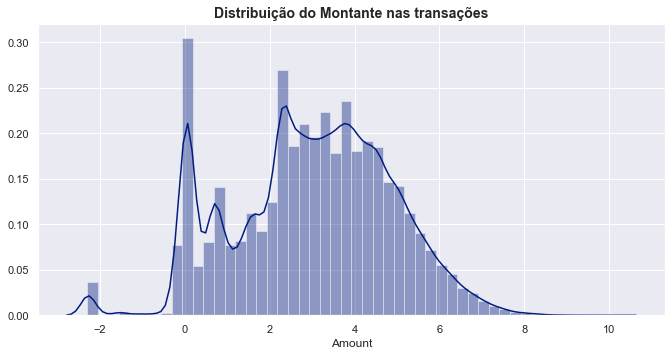

In [8]:
# definindo a área de plotagem
plt.figure(figsize=(10,5))

# plotando o gráfico
sns.distplot(np.log(df.Amount + 0.1))

# definindo título
plt.title("Distribuição do Montante nas transações", fontsize=14, fontweight='bold')

# exibindo o gráfico
plt.show()

Vamos dar uma olhada também na distribuição no formato boxplot, comparando a forma *normal* e *normalizado* pelo logaritmo.

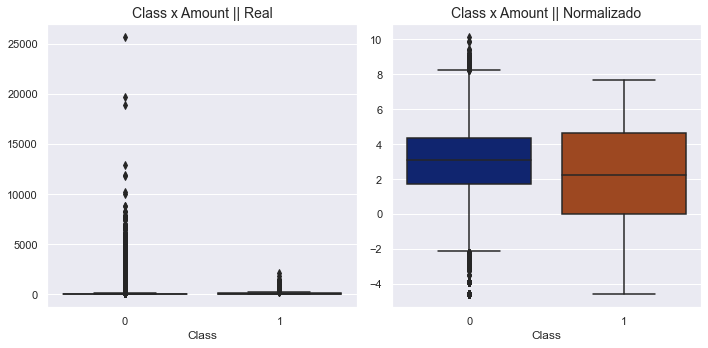

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount", data=df)
ax.set_title("Class x Amount || Real", fontsize=14)
ax.set_xlabel("Class", fontsize=12)
ax.set_ylabel("")

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y=np.log(df.Amount), data=df)
ax1.set_title("Class x Amount || Normalizado", fontsize=14)
ax1.set_xlabel("Class", fontsize=12)
ax1.set_ylabel("")

plt.tight_layout()
plt.show()

Notamos uma pequena diferença no valor normalizado das duas classes. **O IQR (Intervalo interquantil) das transações fraudulentas é maior do que as transações normais, mas as transações normais têm valores mais altos.**

Agora vamos começar analisar a variável **Time**, a variável está em segundos e são contínuos a partir da primeira transação do período, como são muitos dados a granularidade em primeiro momento pode não ajudar, portanto, **vamos criar mais duas variáveis, uma em minutos e outra em horas**, utilizaremos o método *timedelta* do *pandas*.

In [10]:
# convertendo a feature em segundo
timedelta = pd.to_timedelta(df['Time'], unit='s')

# criando uma feature em minutos
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)

# criando uma feature em horas
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

Então plotaremos os gráficos, nas duas granularidades criadas.

<Figure size 720x360 with 0 Axes>

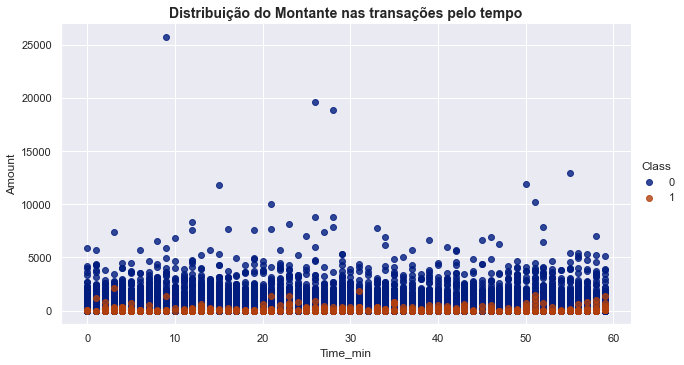

In [11]:
# definindo a área de plotagem
plt.figure(figsize=(10,5))

# plotando o gráfico
sns.lmplot(y='Amount', x='Time_min', data=df, fit_reg=False, aspect=1.8, hue='Class')

# definindo título
plt.title("Distribuição do Montante nas transações pelo tempo", fontsize=14, fontweight='bold')

# exibindo o gráfico
plt.show()

<Figure size 720x360 with 0 Axes>

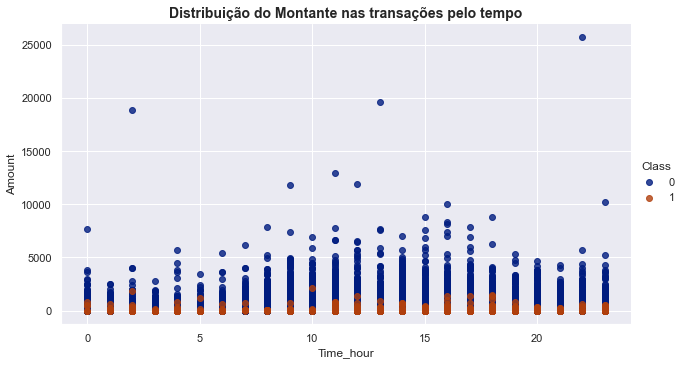

In [12]:
# definindo a área de plotagem
plt.figure(figsize=(10,5))

# plotando o gráfico
sns.lmplot(y='Amount', x='Time_hour', data=df, fit_reg=False, aspect=1.8, hue='Class')

# definindo título
plt.title("Distribuição do Montante nas transações pelo tempo", fontsize=14, fontweight='bold')

# exibindo o gráfico
plt.show()

**Não dá pra afirmar que há um padrão**, pois são dois dias somente de transação coletadas.

No gráfico com o tempo em horas, notamos um ligeiro aumento no período de 10h à 17h (do inicio dessa coleta).

Vamos manter a variável de tempo original e remover as que criamos, para não termos o risco de colinearidades entre elas.

In [13]:
# removendo as duas variáveis de tempo criadas
df = df.drop(['Time_min', 'Time_hour'], axis=1)

Para concluir esta parte, do *Time*, vamos olhar as distribuições primeiro com a feature original e logo em seguida em separados das transações de **fraude** e **não-fraude**.

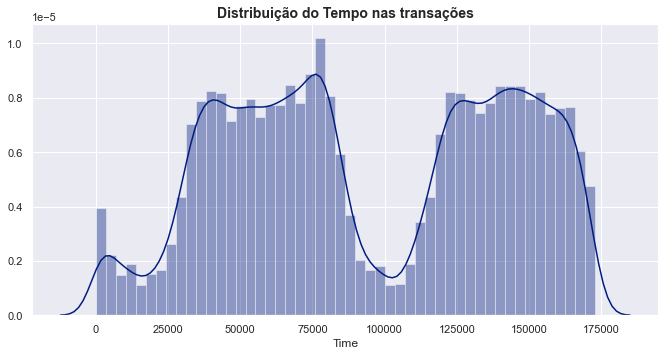

In [14]:
# definindo a área de plotagem
plt.figure(figsize=(10,5))

# plotando o gráfico
sns.distplot(df.Time)

# definindo título
plt.title("Distribuição do Tempo nas transações", fontsize=14, fontweight='bold')

# exibindo o gráfico
plt.show()

Podemos notar **dois picos na distribuição**, lembrando que esta variável é o tempo decorrido, em segundos, da primeira transação destes registros de dados. Não há menção horário do início da transação, mas vejamos que aproximadamente em 100.000 segundos ou próximo de 28 horas após o início nota-se um vale, que provavelmente é o ciclo em que essas transações acontecem, vamos ver se há um período específico que as transções fraudulentas acontecem.

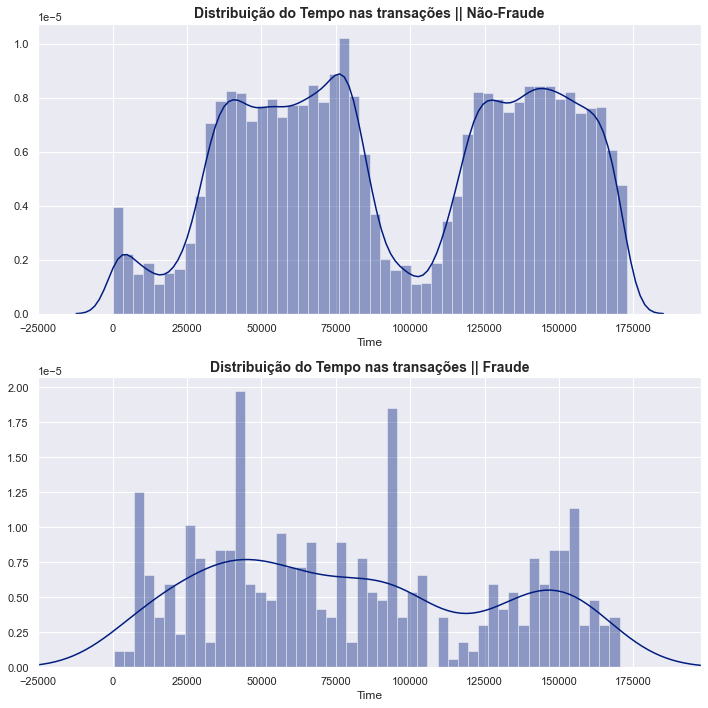

In [15]:
# definindo a área de plotagem
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

# plotando o gráfico
sns.distplot(df[df.Class==0]['Time'], ax=ax1, bins=50)
sns.distplot(df[df.Class==1]['Time'], ax=ax2, bins=50)

# definindo título
ax1.set_title("Distribuição do Tempo nas transações || Não-Fraude", fontsize=14, fontweight='bold')
ax2.set_title("Distribuição do Tempo nas transações || Fraude", fontsize=14, fontweight='bold')

# definindo eixo x
ax2.set_xlim(df.Time.min()-25000, df.Time.max()+25000)
ax1.set_xlim(df.Time.min()-25000, df.Time.max()+25000)

# exibindo o gráfico
plt.tight_layout()
plt.show()

Desconsiderando a escala no eixo y que estão bem diferentes entre os gráficos, estamos interessados em comparar o eixo x, para saber se há um período específico das fraudes ocorrerem.

Notamos alguns picos **próximos de 50.000 e 100.000 segundos**, pode ser que seja pouca amostra para afirmar que de fato há um padrão, visto que são somente 2 dias de transações.

Vamos dar uma olhada geral em todas as distribuições.

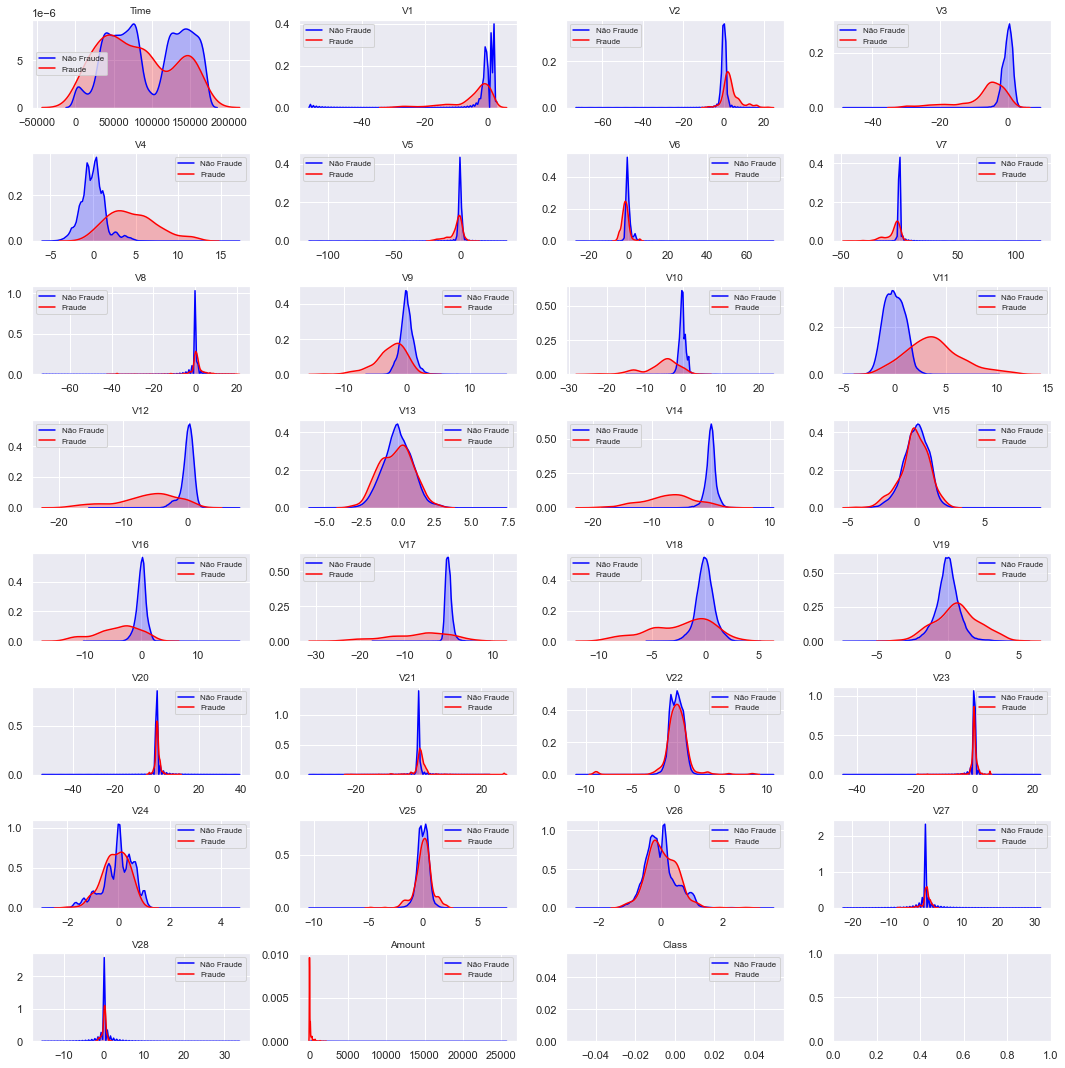

In [16]:
# contando a quantidade de features para o loop
num_plots = len(df.columns)

# separando as classes para a visibilidade
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

# definindo a área de plotagem
nrow = 8
ncol = 4
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15,15))
fig.subplots_adjust(hspace=1, wspace=1)

# plotando gráfico de densidade
idx = 0
for col in df.columns:
    plt.rcParams["axes.labelsize"] = 3
    idx += 1
    plt.subplot(nrow, ncol, idx)
    sns.kdeplot(df_class_0[col], label="Não Fraude", shade=True, color='blue')
    sns.kdeplot(df_class_1[col], label="Fraude", shade=True, color='red')
    plt.title(col, fontsize=10)
    plt.legend(fontsize=8)
plt.tight_layout()
# plt.savefig('density.png')

Analisando as distribuições, notamos algumas variáveis com as distrbiuições bem diferentes, e as que mais chamam a atenção são:
**V4, V10, V11, V12, V14, V17**. Olhando para a curva "*Fraude"* (curva vermelha) observamos **um deslocamento ou uma disperção muito alta** em relação à curva azul.

Se fossemos para ir mais a fundo, com certeza começariamos por essas, falariamos com a equipe técnica ou fazemos pesquisas, mas como não sabemos do que se trata, não conseguiremos avançar muito mais.

## 3. Machine Learning

A partir de agora começaremos a modelar nosso sistema, vamos transformar e ajustar os dados, treinar, avaliar e selecionar o melhor modelo que atenda o objetivo deste projeto.

### 3.1. Preparação dos dados

Como boa prática, devemos separar os dados antes de qualquer transformação no conjunto de dados, vamos seguir da seguinte forma:
1. Separaremos o **dataset em treino e teste**, sendo que o teste vamos dividir com 20% de todo o conjunto e **não mexeremos nele até o modelo escolhido** estar devidamente ajustado e validado.
2. Os dados de treino, por sua vez, vamos separar em **treino e validação para assim otimizar os parâmetros do modelo**.

É a melhor forma, difícil dizer, mas é o que temos em mãos e **com essa divisão não teremos o risco de ter vazamentos de dados** para testar o modelo.

Embora testamos e otimizamos os modelos, não temos como prever se o modelo irá performar bem em produção, por isso, o acompanhamento inicial é fundamental para certificar que o modelo realmente funciona, ou ainda precisa de ajustes.

In [17]:
# Separando os dados para treino e teste
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

Vamos dar uma olhada nas proporções dos dois conjuntos, na nossa variável target.

In [18]:
# visualizando as proporções da variável alvo
df_train.Class.value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [19]:
# visualizando as proporções da variável alvo
df_test.Class.value_counts(normalize=True)

0    0.99828
1    0.00172
Name: Class, dtype: float64

Os dois conjuntos estão com a mesma proporção na variável resposta. **A partir de agora vamos trabalhar somente com o conjunto de dados de treino e o teste somente para validação final**.

Então vamos separar o conjunto de dados de treino, em treino e validação.

### 3.2. Definindo a baseline

A baseline é o resultado que vamos querer "bater", para ver o quanto conseguiremos melhorar nosso modelo, após devidamente treinado e quanto maior o resultado em relação à baseline melhor, tomando **cuidado com os riscos de *overfitting***.

Começamos dividindo o conjunto de dados em **treino e validação** e após separar o X (variáveis preditoras) e y (variável target), utilizaremos o ***StratifiedKFold* que separa os dados para uma validação cruzada preservando o percentual de amostras em cada classe**.

Faremos um *loop* e assim conseguiremos ter os nossos dados separados, conforme mencionado.

In [20]:
# dividindo X e y
X = df_train.drop('Class', axis=1)
y = df_train.Class

# separando os dados mantendo a porcentagem de amostras em cada classe
StratifKfold = StratifiedKFold(n_splits=5, shuffle=False, random_state=42)

# looping para separar os dados em treino e validação
for train_index, val_index in StratifKfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

Vamos confirmar se as proporções entre as classes mantém e dar uma olhada nas dimensões resultantes.

In [21]:
# checando as proporções da classe 1 na divisão
print(f'Dimensões: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proporção do df_train para classe=1: {round(len(df_train[df_train.Class==1]) / df_train.shape[0], 4)}\n")
print(f"Proporção de X_train para classe=1:  {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}")
print(f"Proporção de X_val para classe=1:    {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")

Dimensões: ((182276, 30), (45569, 30), (182276,), (45569,))

Proporção do df_train para classe=1: 0.0017

Proporção de X_train para classe=1:  0.0017
Proporção de X_val para classe=1:    0.0017


Agora vamos treinar um modelo simples (sem parâmetros) de Regressão Logística. **A Regressão Logística na maioria dos casos performa bem e foi escolhido para definição da baseline**.

Treinaremos o modelo, faremos as predições tanto nos dados de treino quanto de validação e calcularemos as métricas de *Accuracy, Precision, Recall e F1-Score*.

In [22]:
# instanciando o modelo
logReg = LogisticRegression()

# treinando o modelo
logReg.fit(X_train, y_train)

# prevendo nos dados de treino
y_pred_base_train = logReg.predict(X_train)

# prevendo nos dados de validação
y_pred_base_val = logReg.predict(X_val)

print('Nos dados de TREINO:')

print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_train, y_pred_base_train)}")
print(f"precision: {precision_score(y_train, y_pred_base_train)}")
print(f"recall:    {recall_score(y_train, y_pred_base_train)}")
print(f"f1:        {f1_score(y_train, y_pred_base_train)}")
print()
print('---' * 20)
print('---' * 20)
print()
print('Nos dados de VALIDAÇÃO:')
print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_val, y_pred_base_val)}")
print(f"precision: {precision_score(y_val, y_pred_base_val)}")
print(f"recall:    {recall_score(y_val, y_pred_base_val)}")
print(f"f1:        {f1_score(y_val, y_pred_base_val)}")
print('---' * 20)

Nos dados de TREINO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9989960280014922
precision: 0.7214765100671141
recall:    0.6825396825396826
f1:        0.7014681892332789

------------------------------------------------------------
------------------------------------------------------------

Nos dados de VALIDAÇÃO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9988149838706138
precision: 0.6436781609195402
recall:    0.7088607594936709
f1:        0.674698795180723
------------------------------------------------------------


Agora vamos criar um dicionário com os modelos de Machine Learning instanciados. Foram selecionados 4 modelos para testar, **Logistic Regression, KNN, Decision Tree e Random Forest**, sendo um de cada tipo.

Assim poderemos ver qual tem a melhor performance com o conjunto de dados e para o selecionado ajustaremos os hiperparâmetros para termos o melhor modelo possível para nossa aplicação.

In [23]:
# Dicionário dos classificadores
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier()
}

Antes de prosseguirmos, vamos definir o que será feito agora, já vimos que as classes da variável target estão desbalanceadas e temos o resultado de previsão dessa forma.

Observamos que a acurácia deu quase 100%, ou seja, é perfeito, porém, como temos menos de 1% da classe mais importante para este projeto, a **acurácia ficou tendenciosa para a classe majoritária** e isso ruim, nosso foco é principalmente em aumentar a precisão (*precision*) e a sensibilidade (*recall).

Então vamos cuidar desse desbalanceamento utilizando alguns métodos. Serão dados uma introdução e a cada uso desses métodos vamos nos aprofundar um pouco mais.

### 3.3. Reamostragem, teste e validação

O método de reamostragem tem o objetivo em **alterar a composição dos dados de treinamento para um modelo de classificação desbalanceado**.

Essa tendência no conjunto de dados de treinamento pode influenciar muitos algoritmos de aprendizado de máquina, levando alguns a ignorar completamente a classe minoritária, sendo um problema, pois normalmente é a classe minoritária em que as previsões são mais importantes.

Existem várias técnicas e vamos utilizar algumas para ver qual a melhor e a mais performática nos dados de treino e validação.

* **Distribuição (Random UnderSampling):** As técnicas de subamostragem ou *Undersampling* aleatória removem exemplos do conjunto de dados de treinamento que pertencem à classe majoritária para equilibrar melhor a distribuição da classe, como reduzir a distorção de 1:100 para 1:10, 1:2 ou mesmo uma classe 1:1 distribuição.

<img src="images/under_sampling.png" width="600">


* **Distribuição (Random Over-Sampling):** A sobreamostragem aleatória envolve a seleção aleatória de exemplos da classe minoritária, com substituição e sua adição ao conjunto de dados de treinamento.

<img src="images/over_sampling.png" width="600">


* **SMOTE (Over-Sampling):** *Synthetic Minority Oversampling Technique* ou Técnica de sobreamostragem de minoria sintética é a abordagem mais simples e envolve a duplicação de exemplos na classe minoritária, embora esses exemplos não adicionem nenhuma informação nova ao modelo, esses novos exemplos podem ser sintetizados a partir dos exemplos existentes.


* **Híbrido: Oversampling e Undersampling:** É a combinação das duas técnicas descritas anteriormente e como essas duas transformações são realizadas em classes separadas, a ordem em que são aplicadas ao conjunto de dados de treinamento não importa, então podemos definir um pipeline, por exemplo, que primeiro a sobreamostra a classe minoritária para 10% da classe majoritária e em seguida a subamostra a classe majoritária para 50% a mais do que a classe minoritária e, por fim ajusta-se a um modelo de Machine Learning.

<img src="images/hibrid.png" width="700">

Após uma breve introdução é hora de começar a aplicá-las.

### 3.3.1. Distribuição (Random UnderSampling)

Para esta *subamostragem* vamos utilizar um dos métodos da família **Near-miss**, da biblioteca *imblearn* que consiste selecionar amostras baseados na distância da classe majoritária com as amostras da classe minoritária, basicamente utilizando o modelo de KNN em seu framework.

Há 3 versões desse método:
* **NearMiss1:** Amostras da classe majoritária com distância média mínima para três amostras da classe minoritária mais próxima.
* **NearMiss2:** Amostras da classe majoritária com distância média mínima para três amostras da classe minoritária mais distantes.
* **NearMiss3:** Amostras da classe majoritária com distância mínima para cada amostras da classe minoritária.

Para este teste vamos utilizar a versão 1, que é padrão quando não passamos nenhum parâmetro.

In [24]:
# instanciando o método
undersample = NearMiss()

# transformando o conjunto de dados
X_under, y_under = undersample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under)
print(counter)

Counter({0: 315, 1: 315})


In [25]:
for nome, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.7816936952752968
precision: 0.0073874413497055005
recall:    0.9367088607594937
f1:        0.014659270998415214
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.05396212337334592
precision: 0.0016214588496907647
recall:    0.8860759493670886
f1:        0.0032369942196531793
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.4678180341899098
precision: 0.003124486104259168
recall:    0.9620253164556962
f1:        0.00622874236774167
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.7403059097193267
precision: 0.006216920104175418
recall:    0.9367088607594937
f1:        0.012351861125020866
---------------------

Podemos observar que a **Random Forest** e a **Regressão Logística** deram praticamente os mesmos resultados com este primeiro método, porém a *precision* deu um resultado muito baixo em todos os modelos.

O próximo método é o oposto desta.

### 3.3.2. Distribuição (Random Over-Sampling)

Este método consiste em adicionar um conjunto aleatório de cópias de amostras da classe minoritária aos dados, podendo aumentar a probabilidade de sobreajuste, porém, isso também pode resultar em um aumento no custo computacional ao ajustar o modelo, especialmente por considerar que o modelo estará vendo as mesmas amostras no conjunto de treinamento novamente.

In [26]:
# instanciando o método
oversample = RandomOverSampler(sampling_strategy='minority')

# transformando o conjunto de dados
X_over, y_over = oversample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_over)
print(counter)

Counter({0: 181961, 1: 181961})


In [27]:
for nome, model in classifiers.items():
    
    model.fit(X_over, y_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.9780113673769448
precision: 0.06828811973807297
recall:    0.9240506329113924
f1:        0.1271777003484321
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9971252386490816
precision: 0.22340425531914893
recall:    0.26582278481012656
f1:        0.24277456647398843
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9990124865588448
precision: 0.6976744186046512
recall:    0.759493670886076
f1:        0.7272727272727273
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9995172156509908
precision: 0.9130434782608695
recall:    0.7974683544303798
f1:        0.8513513513513514
-------------------------------------

Podemos notar agora um resultado superior da **Random Forest** por ter tido um valor significativo na *precision* e um *F1-Score* também bom.

### 3.3.3. SMOTE (Over-Sampling)

O SMOTE *Syntetic Minority Oversampling Technique* consiste em selecionar uma amostra aleatório da classe minoritária escolhido primeiro, então, k vizinhos mais próximos dessa amostra, dai um vizinho também é selecionado aleatoriamente e uma amostra sintética é criado nesse espaço entre essas duas.

In [28]:
# instanciando o método
oversample_smote = SMOTE(sampling_strategy='minority')

# transformando o conjunto de dados
X_smote, y_smote = oversample_smote.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_smote)
print(counter)

Counter({0: 181961, 1: 181961})


In [29]:
for nome, model in classifiers.items():
    
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.9674998354144265
precision: 0.044213263979193757
recall:    0.8607594936708861
f1:        0.08410636982065553
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9431192257894622
precision: 0.017287744909719554
recall:    0.569620253164557
f1:        0.03355704697986577
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9979591388882794
precision: 0.4507042253521127
recall:    0.810126582278481
f1:        0.579185520361991
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9994952709078541
precision: 0.868421052631579
recall:    0.8354430379746836
f1:        0.8516129032258065
--------------------------------------

Novamente a **Random Forest** performou melhor comparando com os demais nesse método, porém a *precision* ficou um pouco menor em comparção com a *Random Over-Sampling* e o *recall* um pouco melhor.

### 3.3.4. Híbrido: Oversampling e Undersampling

Que tal combinar as duas técnicas para ver se performa melhor do que individualmente. Vamos criar uma *pipeline* no qual aplica-se primeiro uma técnica de sobreamostragem ao conjunto de dados e, em seguida, aplica a subamostragem à saída da transformação da sobreamostragem, antes de retornar o resultado final, assim que ele funciona. Permite que as transformações sejam empilhadas ou aplicadas em sequência em um conjunto de dados.

Podemos definir a porcentagens aplicadas às amostras para cada técnica. Esta técnica é uma alternativa, mas depende em cada caso, pode ser que indidualmente algumas técnica performa melhor do que combinada e vale a pena testar para ver os resultados.

In [30]:
# transformando o conjunto de dados
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# instanciando um pipeline com os dois métodos
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# transformando o conjunto de dados
X_under_over, y_under_over = pipeline.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under_over)
print(counter)

Counter({0: 36392, 1: 18196})


In [31]:
for nome, model in classifiers.items():
    
    model.fit(X_under_over, y_under_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.9799205600298448
precision: 0.07433808553971487
recall:    0.9240506329113924
f1:        0.13760603204524033
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9845289560885689
precision: 0.03698224852071006
recall:    0.31645569620253167
f1:        0.0662251655629139
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.997586078254954
precision: 0.39869281045751637
recall:    0.7721518987341772
f1:        0.5258620689655172
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9994294366784436
precision: 0.8354430379746836
recall:    0.8354430379746836
f1:        0.8354430379746836
------------------------------------

Realizei dois testes, combinando com o *undersampling* com *random over-sampling* e um teste com *smote over-sampling* e a combinação de **undersamplig + random over-sampling** com **Random Forest** foi o que obteve o melhor resultado.

Comparando com o SMOTE sozinho, a combinação diminuiu um pouquinho a *precision* porém melhorou o *recall* e *F1-Score*, mas que também não descartaremos e podemos testar com validação cruzada **SMOTE** com **Random Forest**.

### 3.4. Avaliação dos modelos

Após testar vários modelos vou selecionar o que na minha visão performou melhor, a **Random Forest** obteve o melhor resultado em todos os testes, mas para definir qual foi a melhor técnica, vamos revisar sobre as métricas avaliadas no nosso contexto.

* **True Positive (TP):** ou verdadeiros positivos classificam corretamente as transações que são fraudes.
* **False Positive (FP):** ou falsos positivos classificam incorretamente, dizendo que uma transação é fraude quando de fato não é fraude.
* **True Negative (TN):** ou verdadeiros negativos classificam corretamente as transações que não são fraudes.
* **False Negative (FN):** ou falsos negativos classificam incorretamente, dizendo que uma transação não é fraude quando de fato ela é uma fraude.
* **Precision:** ou precisão calculado por: TP/(TP + FP)
* **Recall:** ou sensibilidade calculado por: TP/(TP+FN)

*`Precision` ou precisão significa o quanto o modelo **detecta quando uma transação é uma fraude** enquanto que `recall` ou sensibilidade nos **informa a quantidade de casos de fraude que nosso modelo não foi capaz de detectar**.*

Neste caso, qualquer método a ser escolhido os resultados não serão muito diferentes, então na minha opinião a técnica combinada será escolhida, embora dinimua bem pouco na precisão aumentamos o recall, e quanto maior o resultado ou mais equilibrado melhor. Outro ponto é que as vezes uma precisão maior pode ter o risco de overfitting, então vou tunar os parâmetros da **Random Forest** com **Under-sampling + Random Over-sampling**.

Vamos também rodar ajustar e avliar a **Random Forest + SMOTE**, por ter ficado próximos.

### 3.5. Ajustando (tunning) o modelo selecionado

Vamos **definir os hiperparâmetros** para analisar a melhor performance com a **validação cruzada**, mas antes vamos colocar os dados no formato para o algoritmo receber.

Não foram definidos um range alto de hiperparâmetros por causa da quantidade de dados que além de exigir muito poder computacional o tempo também será elevado, mesmo com o *RandomizedSearchCV* ao invés do *GridSearchCV*.

A validação cruzada ou *cross-validation* é uma **técnica no qual o avaliamos se o modelo generaliza**, ou seja, se o modelo tem uma **boa performance com diferentes amostras**, sem overfitting.

In [32]:
# transformando os dados
X_train_array = X_train.values
X_val_array = X_val.values
y_train_array = y_train.values
y_val_array = y_val.values

Vamos criar uma lista com alguns hiperparâmetros para que seja selecionado quais são os melhores para o modelo.

In [33]:
# número de árvores
n_estimators = [3,5,10,100]

# número de features para considerar em cada split
max_features = [3,4,5,6,None]

# número máximo de níveis da árvore
max_depth = [3,4,5,6,None]

# pesos para cada classe
class_weight = ['balanced',None]

# colocando os parametros definidos em um dicionário
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}

# exibindo os parâmetros
pprint(random_grid)

{'class_weight': ['balanced', None],
 'max_depth': [3, 4, 5, 6, None],
 'max_features': [3, 4, 5, 6, None],
 'n_estimators': [3, 5, 10, 100]}


Agora vamos criar nossa validação cruzada, com o pipeline para o método selecionado e rodar a validação cruzada com o Random Forest.

Utilizaremos o **RandomizedSearchCV** para não fazer com todas as combinações possíveis em função do tempo que poderá ser muito alto e alguns artigos dizem que o RandomizedSearchCV é tão eficaz quanto o GridSearchCV.

No *loop* é utilizado o **StratifiedKFold** para separar o conjunto de dados mantendo a proporção entre as classes, a cada loop para diferentes amostras é **executado o pipeline para aquela amostra específica** e em seguida armazenado na lista vazia criada para receber os resultados que no fim será avaliado pela média desses valores.

In [34]:
# definindo listas vazias para receber os resultados da validação cruzada
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

#*-----------------------------------------------------------------------------*
# # definindo para o método de combinação do undersampling e oversampling
# over = RandomOverSampler(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
#*-----------------------------------------------------------------------------*

# instanciando o RandomizedSearchCV para validação cruzada com o grid de parametros
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

# iniciando o tempo e contador para o loop
start = time.time()
count = 0

# looping para a validação cruzada
for train, test in StratifKfold.split(X_train_array, y_train_array):
    
    # instanciando o pipeline com técnica de reamostragem
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rf_grid)
    # pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', rf_grid)])
    
    # executando o pipeline para treinar o modelo
    model = pipeline.fit(X_train_array[train], y_train_array[train])
    
    # identificando os melhores parâmetros no treinamento
    best_est = rf_grid.best_estimator_
    
    # realizando as previsões com o resultado do treinamento
    prediction = best_est.predict(X_train_array[test])
    
    # armazenando os resultados
    accuracy_lst.append(pipeline.score(X_train_array[test], y_train_array[test]))
    precision_lst.append(precision_score(y_train_array[test], prediction))
    recall_lst.append(recall_score(y_train_array[test], prediction))
    f1_lst.append(f1_score(y_train_array[test], prediction))
    auc_lst.append(roc_auc_score(y_train_array[test], prediction))
    
    # identificando em qual loop está
    count = count + 1
    print(f"kfold nº: {count}")
    
    # medindo o tempo de cada loop
    intervalo = time.time()
    print(f"tempo intermediário: {(intervalo - start)/60:.1f} minutos")
    print()

print('---' * 20)
print(f"melhores estimadores para RF: {rf_grid.best_params_}")

# imprimindo a média dos resultados da validação cruzada
print('---' * 20)
print('Resultados')
print(f"accuracy:  {np.mean(accuracy_lst)}")
print(f"precision: {np.mean(precision_lst)}")
print(f"recall:    {np.mean(recall_lst)}")
print(f"f1:        {np.mean(f1_lst)}")
print(f"AUC:       {np.mean(auc_lst)}")
print('---' * 20)

# imprimindo o tempo total da validação cruzada
end = time.time()
print(f"Tempo do loop para validação cruzada: {(end - start)/60:.1f} minutos")

kfold nº: 1
tempo intermediário: 48.4 minutos

kfold nº: 2
tempo intermediário: 92.3 minutos

kfold nº: 3
tempo intermediário: 132.9 minutos

kfold nº: 4
tempo intermediário: 174.8 minutos

kfold nº: 5
tempo intermediário: 219.2 minutos

------------------------------------------------------------
melhores estimadores para RF: {'n_estimators': 100, 'max_features': 6, 'max_depth': None, 'class_weight': 'balanced'}
------------------------------------------------------------
Resultados
accuracy:  0.9994623540037683
precision: 0.8754856028697757
recall:    0.8063492063492064
f1:        0.8384231466815123
AUC:       0.9030729333838078
------------------------------------------------------------
Tempo do loop para validação cruzada: 219.2 minutos


O resultado é bom com este pipeline e ficou próximo em relação ao que já tinhamos avaliado anteriormente. Isso é muito bom porque o modelo teve boa performance com diferentes amostras desse conjunto.

### 3.6. Avaliação do modelo ajustado

### 3.6.1. Análise das principais métricas de classificação

A princípio nossa primeira escolha era com o Random Forest e a combinação de under + over sampling, porém o recall ficou um pouco mais baixo em relação a primeira avaliação, então rodei outra validação cruzada com o SMOTE somente e o resultado ficou um melhor, mesmo que tenha diminuido um pouco a precision em relação à primeira, mas aumentou um pouco o recall, podemos analisar os resultados abaixo.

**Random Forest com Oversampling + Undersampling**

**accuracy:**  0.9994678400691622<br>
**precision:** 0.8956644812571944<br>
**recall:**    0.7873015873015874<br>
**f1:**        0.8361395422653626<br>
**AUC:**       0.8935683587811958<br>
<br>
<br>
**Random Forest com SMOTE**<br>

**accuracy:**  0.9994623540037683<br>
**precision:** 0.8754856028697757<br>
**recall:**    0.8063492063492064<br>
**f1:**        0.8384231466815123<br>
**AUC:**       0.9030729333838078<br>

### 3.6.2. Curva ROC-AUC

Agora vamos plotar o gráfico da **Curva ROC**. A *Receiver Operating Characteristic Curve* (ROC curve) ou Curva Característica de Operação do Receptor, é uma representação gráfica que ilustra o desempenho (ou performance) de um sistema classificador binário à medida que o seu limite de discriminação varia. A curva ROC é também conhecida como curva de característica de operação relativa, porque o seu critério de mudança é resultado da operação de duas características (TP e FP).

O **Curva ROC** possui dois parâmetros:
* Taxa de verdadeiro positivo (True Positive Rate ou TPR), que é dado por TP/(TP + FN)
* Taxa de falso positivo (False Positive Rate ou FPR), que é dado por FP / (FP + TN)

Quanto mais superior à esquerda o valor melhor é, e vamos criar uma função para fazermos uma validação cruzada plotando o resultado de cada um dos *splits* e por fim a média do resultado.

**AUC** fornece uma medida agregada de desempenho em todos os limites de classificação possíveis, ou seja, como a probabilidade de que o modelo classifica um exemplo positivo aleatório mais alto do que um exemplo negativo aleatório.

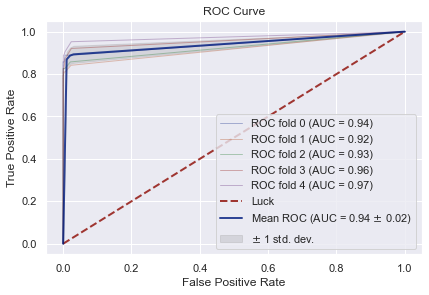

In [35]:
# criando uma função para plotar o gráfico
def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    # definindo algumas listas vazias para receber o resultado
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # definindo o contador
    i = 0
    
    # loop ara validação cruzada
    for train, test in cv.split(X, y):
        
        # executando a função e armazenando as probabilidade dos resultados
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        
        # computando a curva ROC e AUC
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # plotando a curva ROC da validação cruzada em individualmente
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    
    # plotando a linha diagonal como referência da taxa de 50/50
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # calculando as médias e desvio padrão
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # plotando curva ROC com a média dos resultados
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # customizando o gráfico
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")
    
    # exibindo o gráfico
    plt.show()
    
# executando função e plotando a Curva ROC AUC
draw_cv_roc_curve(best_est, StratifKfold, X_train, y_train, title='ROC Curve')

Pela média dos KFolds, 0.91 nos mostra que o modelo está com uma **boa taxa de acertividade**.

### 3.6.3. Curva Precision-Recall

E agora plotaremos a curva **Precision-Recall** que resume a compensação entre a taxa de verdadeiros positivos e o valor preditivo positivo para um modelo preditivo usando limites de probabilidade diferentes.

Uma área alta sob a curva representa tanto a alta sensibilidade (recall) quanto a alta precisão (precision), onde a alta precisão está relacionada a uma taxa baixa de falsos positivos e a alta sensibilidade está relacionada a uma baixa taxa de falsos negativos.

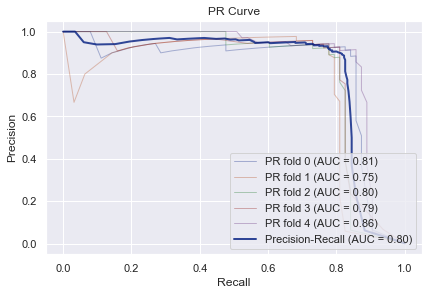

In [36]:
# criando uma função para plotar o gráfico
def draw_cv_pr_curve(classifier, cv, X, y, title='PR Curve'):
    # definindo algumas listas vazias para receber o resultado
    y_real = []
    y_proba = []

    # definindo o contador
    i = 0
    
    # loop ara validação cruzada
    for train, test in cv.split(X, y):
        
        # executando a função e armazenando as probabilidade dos resultados
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        
        
        # computando a curva ROC e AUC
        precision, recall, _ = precision_recall_curve(y.iloc[test], probas_[:, 1])

        # plotando a Precision-Recall da validação cruzada em individualmente
        plt.plot(recall, precision, lw=1, alpha=0.3,
                 label='PR fold %d (AUC = %0.2f)' % (i, average_precision_score(y.iloc[test], probas_[:, 1])))

        y_real.append(y.iloc[test])
        y_proba.append(probas_[:, 1])

        i += 1
    
    # concatenando os valores da lista
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)

    # calculando a Precision-Recall
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    
    # plotando as médias dos resultados
    plt.plot(recall, precision, color='b',
             label=r'Precision-Recall (AUC = %0.2f)' % (average_precision_score(y_real, y_proba)),
             lw=2, alpha=.8)

    # customizando o gráfico
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")
    
    # exibindo o gráfico
    plt.show()

# executando função e plotando a Curva Precision-Recall
draw_cv_pr_curve(best_est, StratifKfold, X_train, y_train, title='PR Curve')

### 3.7. Conhecendo as variáveis importantes

Por aqui encerro meus testes a principio, vou dar uma olhada nas features mais importantes para o modelo, porém não irei fazer nenhuma modificação por enquanto.

Como próximo passo falaria com a equipe técnica ou buscaria informações pra ver se faz sentido das principais features que o modelo retornou serem de fato as mais importantes.

Se tivesse tempo coletaria mais dados para treinamento e certificaria se o modelo está generalizando da forma que esperamos.

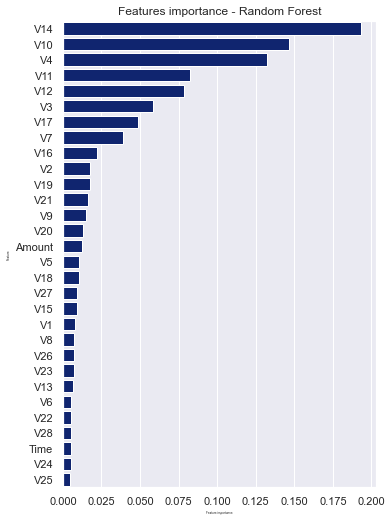

In [37]:
# definindo um dataframe com as features e o score para cada uma, resultado do modelo
feat_import = pd.DataFrame({'Feature': df_train.columns[:-1], 'Feature importance': best_est.feature_importances_})

# classificando em ordem de importancia
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

# definindo a área de plotagem
f, ax = plt.subplots(figsize=(5, 8))

# plotando o gráfico
ax = sns.barplot(y='Feature', x='Feature importance', data=feat_import, color='b')

# inserindo o título
ax.set_title('Features importance - Random Forest',fontsize=12)

# exibindo o gráfico
plt.show() 

## 4. Modelo Final

Após validarmos nosso modelo, utilizaremos **todos os dados de X e y, do dataset de treinamento, para o modelo final** com os melhores hiperparâmetros encontrados na validação, definir o pipeline e treinar o modelo.

### 4.1. Treinamento do modelo

Treinaremos o modelo com os melhores hiperparâmetros encontrados, executaremos o pipeline com o SMOTE e a Random Forest ajustada e por fim, o modelo será treinado.

In [38]:
# separando novamente os dados
X_all = df_train.drop('Class', axis=1)
y_all = df_train.Class

# instanciando o modelo final com os parametros encontrados na validação cruzada
final_model = rf_grid.best_estimator_

# definindo o pipeline para reamostragem oversampling e o modelo final
pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), final_model)

# treinando o modelo com os parametros ajustados com todos os dados
model = pipeline.fit(X_all, y_all)

### 4.2. Preparação, previsão e avaliação nos dados de teste

Agora é o momento de utilizar aquele conjunto de dados de teste, que dividimos após a Análise Exploratória, com 20% do total dos dados e importante ressaltar que não tocamos em momento algum durante a validação.

Da mesma forma, vamos separar os dados e simular entrada de dados novos para saber se o nosso modelo generaliza bem, o esperado é um resultado um pouco abaixo do que foi validado, mas não muito, pois se ficar abaixo do esperado, devemos re-ajustar o modelo porque resultou em overfitting.

In [39]:
# separando os dados de teste
X_test = df_test.drop('Class', axis=1)
y_test = df_test.Class

# realizando as predições nos dados de teste
y_pred_test = model.predict(X_test)

# imprimindo os resultados
print(f"accuracy:  {accuracy_score(y_test, y_pred_test)}")
print(f"precision: {precision_score(y_test, y_pred_test)}")
print(f"recall:    {recall_score(y_test, y_pred_test)}")
print(f"f1:        {f1_score(y_test, y_pred_test)}")

accuracy:  0.9995084442259752
precision: 0.8645833333333334
recall:    0.8469387755102041
f1:        0.8556701030927835


E por fim vamos plotar a **Matriz de Confusão**.

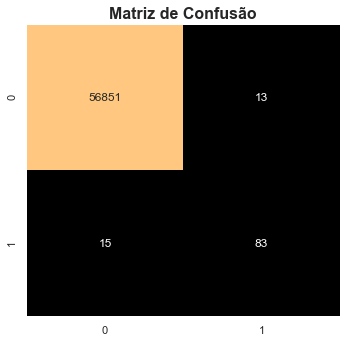

In [40]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Matriz de Confusão", fontsize=16, fontweight='bold')
plt.show()

Comparando com a **Validação Final nos dados de validação**, o resultado nos **dados de teste ficaram ótimos**. Nos dados de teste a precisão diminuiu bem pouco, sendo que o recall e o f1-Score aumentaram, podemos comparar abaixo:

In [47]:
pd.DataFrame(index=['Baseline', 'Validação', 'Teste'], 
             data = {"accuracy": [accuracy_score(y_val, y_pred_base_val), np.mean(accuracy_lst), accuracy_score(y_test, y_pred_test)], 
                     "precision": [precision_score(y_val, y_pred_base_val), np.mean(precision_lst), precision_score(y_test, y_pred_test)],
                     "recall": [recall_score(y_val, y_pred_base_val), np.mean(recall_lst), recall_score(y_test, y_pred_test)],
                     "f1": [f1_score(y_val, y_pred_base_val), np.mean(f1_lst), f1_score(y_test, y_pred_test)]}
            )

,accuracy,precision,recall,f1
Baseline,0.998815,0.643678,0.708861,0.674699
Validação,0.999462,0.875486,0.806349,0.838423
Teste,0.999508,0.864583,0.846939,0.855670


### 4.3. Salvando o modelo treinado

In [41]:
# salvando o modelo treinado no diretório atual
pkl_filename_model = "modelo_final/RandomForestModel.pkl"
with open(pkl_filename_model, 'wb') as file:
    pickle.dump(model, file)

# # importando o modelo treinado
# with open(pkl_filename_model, 'rb') as file:
#     pickle_RandomForestModel = pickle.load(file)

### 4.4. Salvando os resultados

In [42]:
# armazenando as previsões no dataframe de teste
df_test['Predicted'] = y_pred_test

# comparando com real com o previsto no dataframe
df_test['Correct?'] = np.where(df_test['Class'] == df_test['Predicted'], 'Yes', 'No')

# criando uma instancia xlswriter
writer = pd.ExcelWriter('resultado_final/Resultado_final.xlsx', engine='xlsxwriter')

# convertendo o dataframe em um objeto excel
df_test.to_excel(writer, sheet_name='Previsões', index=False)

# salvando o arquivo no diretório atual
writer.save()

## 5. Conclusão

Neste projeto fizemos Análise Exploratória de Dados, vimos que a distribuição de algumas variáveis preditoras são bem diferentes entre as classes, separamos o conjunto de dados para treino, validação e teste, revisamos algumas técnicas de reamostragem de dados para classes desbalanceadas, testando cada um deles, junto com 4 modelos diferentes de Machine Learning.

A melhor combinação foi da técnica SMOTE (over sampling) com a Random Forest, no qual fizemos uma validação cruzada e resultamos bem, avaliando as métricas de avaliação.

Com o modelo devidamente ajustado, utilizamos todos os dados para treinamento e fizemos previsões nos dados de teste. Comparando com os resultados da baseline, validação e teste, concluímos que, o **modelo final obteve**:
* **Melhoria de 26% na precision**, em relação à baseline e uma redução de 1% do modelo de validação.
* **Melhoria de 16% na recall**, em relação à baseline e uma melhoria de 4% do modelo de validação.
* **Melhoria de 21% no F1-Score**, em relação à baseline e uma melhoria de 2% do modelo de validação.

## 6. Referências

Documentação do Scikit-Learn<br>
https://scikit-learn.org/stable/user_guide.html

Credit Card Fraud Prediction - [RF + SMOTE]<BR>
https://www.kaggle.com/kabure/credit-card-fraud-prediction-rf-smote

Credit Fraud || Dealing with Imbalanced Datasets<br>
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

SMOTE for Imbalanced Classification with Python<br>
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Undersampling Algorithms for Imbalanced Classification<br>
https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

How to Combine Oversampling and Undersampling for Imbalanced Classification<br>
https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/

How to Plot PR-Curve Over 10 folds of Cross Validation in Scikit-Learn<br>
https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn